<a href="https://colab.research.google.com/github/Madhusudan3223/AI-age-gender-race-estimator/blob/main/AI_Age%2C_Gender_%26_Race.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 AI Age, Gender & Race Estimation Using CNN (MobileNetV2)

This project uses deep learning and transfer learning (MobileNetV2) to predict **Age**, **Gender**, and **Race** from face images. It is trained on the UTKFace dataset and deployed as a web app for real-time inference.

---

## 📁 Dataset
- **Source**: [UTKFace Dataset](https://www.kaggle.com/datasets/jangedoo/utkface-new)
- **Downloaded via** `kagglehub` in Colab:


---

## 📊 Dataset Preprocessing
- Extracted `age`, `gender`, and `race` from image filenames.
- Created a structured Pandas DataFrame for modeling.

---

## 🧪 Train-Test Split
- Performed using `train_test_split` from Scikit-Learn.

---

## 🔄 Data Generator
- Built a custom `DataGenerator` class to load and preprocess image batches efficiently using OpenCV.

---

## 🏗️ Model Architecture
- Used **MobileNetV2** as a feature extractor (Transfer Learning).
- The model has 3 heads:
  - `age_output`: Regression (MAE loss)
  - `gender_output`: Binary classification (Sigmoid + Binary Crossentropy)
  - `race_output`: Multi-class classification (Softmax + Sparse Categorical Crossentropy)

---

## ⚙️ Model Compilation & Training
- Optimizer: Adam
- Metrics: MAE (for Age), Accuracy (for Gender and Race)
- Trained for 10 epochs using `.fit()`.




---

## 📈 Evaluation
- Evaluated the model on test data:

  - Age MAE
  - Gender Accuracy
  - Race Accuracy

---

## 🖼️ Prediction on a Custom Image
- Uploaded an image manually.
- Preprocessed it with Keras utility functions.
- Displayed predicted:
  - Age (int)
  - Gender (Male/Female)
  - Race (White, Black, Asian, Indian, Others)

---

## 🌐 Deployed on Streamlit Cloud
App built with Streamlit and deployed live here:

🔗 **Try Now**: [Age-Gender-Race Estimator Web App](https://ai-age-gender-race-estimator-i2rarf6qkjtruwpjo2cbxj.streamlit.app/)


---

## 🎓 Educational Use Only
This app demonstrates:
- Multi output deep learning
- Transfer learning (MobileNetV2)
- Real time inference and deployment
- End-to-end ML workflow using Colab + Streamlit

---


### 📦 Dataset Loading

We are using the **UTKFace Dataset**, a large-scale face dataset labeled with age, gender, and race attributes. This dataset is commonly used for facial analysis tasks and is available on Kaggle.

The code below uses the `kagglehub` library to download the dataset directly into the Colab environment:

- **Source**: [UTKFace Dataset on Kaggle](https://www.kaggle.com/datasets/jangedoo/utkface-new)
- **Attributes**:
  - Age: 0–116
  - Gender: Male/Female
  - Race: 5 classes (White, Black, Asian, Indian, Others)


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jangedoo/utkface-new")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/utkface-new


### 🗂 Exploring Dataset Files

After downloading the UTKFace dataset, we use Python’s `os` module to recursively walk through the dataset directory and print out all file paths. This helps in verifying that the dataset was downloaded correctly and inspecting its structure.

Each image file is typically named in the format:


In [2]:
import os

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/kaggle/input/utkface-new/crop_part1/14_1_0_20170104005937407.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/1_0_2_20161219162626830.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/26_1_2_20170104022154229.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/10_0_0_20170110220539329.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/31_1_0_20170105162529475.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/2_0_3_20161219230609241.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/29_0_0_20170103181910385.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/36_1_0_20170109141845861.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/2_0_4_20170103205319954.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/2_1_2_20161219151919100.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/9_1_0_20170109202228755.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/72_1_3_20170109142938059.jpg.chip.jpg
/kaggle/input/utkface-new/crop_part1/75_0_0_2017011121

### 🧾 Parsing Metadata from File Paths

The UTKFace dataset encodes key information in the filenames. This cell extracts that metadata:

- **Age** (as an integer)
- **Gender** (0 = Male, 1 = Female)
- **Race** (0 = White, 1 = Black, 2 = Asian, 3 = Indian, 4 = Others)

We define a helper function `parse_filepaths()` to:
1. Loop through all file paths
2. Extract and parse the filename
3. Build a Pandas DataFrame with structured columns: `age`, `gender`, `race`

This parsed data is used for analysis and training our AI model.


In [3]:
import pandas as pd

def parse_filepaths(filepaths):
    def parse_path(path):
        try:
            filename = os.path.basename(path)
            parts = filename.split('_')
            age, gender, race = int(parts[0]), int(parts[1]), int(parts[2])
            return age, gender, race
        except Exception as ex:
            return None, None, None

    df = pd.DataFrame(filepaths, columns=['filepath'])
    df['age'], df['gender'], df['race'] = zip(*df['filepath'].apply(parse_path))
    df.dropna(inplace=True)
    df['age'] = df['age'].astype(int)
    df['gender'] = df['gender'].astype(int)
    df['race'] = df['race'].astype(int)
    return df

filepaths = [os.path.join(dirname, filename) for dirname, _, filenames in os.walk(path) for filename in filenames]
df = parse_filepaths(filepaths)
display(df.head())

,filepath,age,gender,race
0,/kaggle/input/utkface-new/UTKFace/26_0_2_20170...,26,0,2
1,/kaggle/input/utkface-new/UTKFace/22_1_1_20170...,22,1,1
2,/kaggle/input/utkface-new/UTKFace/21_1_3_20170...,21,1,3
3,/kaggle/input/utkface-new/UTKFace/28_0_0_20170...,28,0,0
4,/kaggle/input/utkface-new/UTKFace/17_1_4_20170...,17,1,4


### 🧪 Train-Test Split

To ensure our model can generalize well, we split the dataset into:

- **Training Set (80%)**: Used to train the model.
- **Test Set (20%)**: Used to evaluate the model's performance on unseen data.

We use `train_test_split()` from `sklearn.model_selection` with a fixed `random_state` for reproducibility.


In [4]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(f"Train size: {len(train_df)}")
print(f"Test size: {len(test_df)}")

Train size: 53572
Test size: 13394


### 🧠 Data Generator (Custom Keras Sequence)

To efficiently feed images and labels during training, we define a custom `DataGenerator` class that:

- **Loads images** from file paths.
- **Resizes** them to `(128, 128)` and normalizes pixel values to `[0, 1]`.
- Returns data in batches along with three labels: **age**, **gender**, and **race**.
- Implements `on_epoch_end()` to shuffle data at the end of each epoch (optional).

We create `train_gen` and `test_gen` instances for training and testing datasets.


In [5]:
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import cv2
import numpy as np

class DataGenerator(Sequence):
    def __init__(self, df, batch_size=32, dim=(128, 128), n_channels=3, shuffle=True):
        self.df = df
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        df_temp = self.df.iloc[indexes]
        X, y = self.__data_generation(df_temp)
        return X, y

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.df))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, df_temp):
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y_age = np.empty((self.batch_size), dtype=int)
        y_gender = np.empty((self.batch_size), dtype=int)
        y_race = np.empty((self.batch_size), dtype=int)

        for i, (index, row) in enumerate(df_temp.iterrows()):
            img = cv2.imread(row['filepath'])
            img = cv2.resize(img, self.dim)
            X[i,] = img / 255.0
            y_age[i] = row['age']
            y_gender[i] = row['gender']
            y_race[i] = row['race']

        return X, {'age_output': y_age, 'gender_output': y_gender, 'race_output': y_race}

train_gen = DataGenerator(train_df)
test_gen = DataGenerator(test_df)

### 🧱 Model Architecture: Multi-Output Age, Gender, and Race Estimator

We use **MobileNetV2** (pre-trained on ImageNet) as the base model for feature extraction. It is **frozen** to prevent weight updates during training.

Three output heads are added on top:
- **Age Output**: A dense layer with 1 neuron for **regression**.
- **Gender Output**: A dense layer with sigmoid activation for **binary classification**.
- **Race Output**: A dense layer with softmax activation for **multi-class classification** (5 races).

The model accepts input shape `(128, 128, 3)` and returns 3 outputs simultaneously.


In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def create_model(input_shape=(128, 128, 3)):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the base model

    inputs = Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)

    # Age output
    age_output = Dense(1, name='age_output')(x)

    # Gender output
    gender_output = Dense(1, activation='sigmoid', name='gender_output')(x)

    # Race output
    race_output = Dense(5, activation='softmax', name='race_output')(x)

    model = Model(inputs=inputs, outputs=[age_output, gender_output, race_output])

    return model

model = create_model()
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mobilenetv2_1.00_1… │ (None, 4, 4,      │  2,257,984 │ input_layer_1[0]… │
│ (Functional)        │ 1280)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 1280)      │          0 │ mobilenetv2_1.00… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ age_output (Dense)  │ (None, 1)         │      1,281 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender_output       │ (None, 1)         │      1,281 │ global_average_p… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ race_output (Dense) │ (None, 5)         │      6,405 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,266,951 (8.65 MB)

 Trainable params: 8,967 (35.03 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### ⚙️ Model Compilation & Training

The model is compiled with:

- **Optimizer**: `adam` for adaptive learning.
- **Loss functions**:
  - `mae` (Mean Absolute Error) for **age regression**.
  - `binary_crossentropy` for **gender classification**.
  - `sparse_categorical_crossentropy` for **race classification**.
- **Metrics**:
  - `mae` for age.
  - `accuracy` for gender and race.

The model is then trained using the custom data generators for **10 epochs**, with validation on the test set.


In [7]:
model.compile(optimizer='adam',
              loss={'age_output': 'mae', 'gender_output': 'binary_crossentropy', 'race_output': 'sparse_categorical_crossentropy'},
              metrics={'age_output': 'mae', 'gender_output': 'accuracy', 'race_output': 'accuracy'})

history = model.fit(train_gen,
                    validation_data=test_gen,
                    epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1674/1674 ━━━━━━━━━━━━━━━━━━━━ 709s 421ms/step - age_output_loss: 14.4273 - age_output_mae: 14.4273 - gender_output_accuracy: 0.7759 - gender_output_loss: 0.4679 - loss: 15.9822 - race_output_accuracy: 0.5906 - race_output_loss: 1.0870 - val_age_output_loss: 10.4179 - val_age_output_mae: 10.4179 - val_gender_output_accuracy: 0.8274 - val_gender_output_loss: 0.3912 - val_loss: 11.7011 - val_race_output_accuracy: 0.6655 - val_race_output_loss: 0.8920
Epoch 2/10
1674/1674 ━━━━━━━━━━━━━━━━━━━━ 475s 284ms/step - age_output_loss: 10.1881 - age_output_mae: 10.1881 - gender_output_accuracy: 0.8269 - gender_output_loss: 0.3815 - loss: 11.4322 - race_output_accuracy: 0.6801 - race_output_loss: 0.8626 - val_age_output_loss: 9.9463 - val_age_output_mae: 9.9463 - val_gender_output_accuracy: 0.8369 - val_gender_output_loss: 0.3746 - val_loss: 11.1684 - val_race_output_accuracy: 0.6902 - val_race_output_loss: 0.8475
Epoch 3/10
1674/1674 ━━━━━━━━━━━━━━━━━━━━ 487s 291ms/step - age_output_los

### 💾 Save Trained Model

The trained multi-output model is saved in Keras format using:



In [9]:
model.save("age_gender_race_model.keras")


### 📥 Load the Saved Model

We now reload the previously trained and saved model using:




In [10]:
from keras.models import load_model

# Load the saved model
model = load_model("age_gender_race_model.keras")

print("✅ Model loaded successfully.")


✅ Model loaded successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [15]:
import os

test_img_path = "/kaggle/input/utkface-new/31_1_2_20170116174525125.jpg.chip.jpg"
print("Image exists:", os.path.exists(test_img_path))


Image exists: False


### 🗂 Scan Dataset Folder for Image Paths

We recursively scan the UTKFace dataset directory to collect full paths of all `.jpg` image files. These paths will be used later for inference or visualization.

This ensures we can load any image dynamically and use the trained model to predict age, gender, and race.

Sample output:


In [16]:
import os

# Scan and list all files in the dataset folder
image_paths = []
for dirname, _, filenames in os.walk("/kaggle/input/utkface-new"):
    for filename in filenames:
        if filename.endswith(".jpg"):
            full_path = os.path.join(dirname, filename)
            image_paths.append(full_path)

# Show a few paths
print("Sample image paths:")
for path in image_paths[:5]:
    print(path)


Sample image paths:
/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg


### 🧪 Test the Model on a Sample Image

We load a test image from the UTKFace dataset, preprocess it to the required input shape `(128, 128, 3)`, normalize it, and feed it to the model.

The model predicts:
- **Age** (regression)
- **Gender** (binary classification)
- **Race** (multi-class classification: White, Black, Asian, Indian, Others)

The prediction is visualized using `matplotlib` along with the image.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


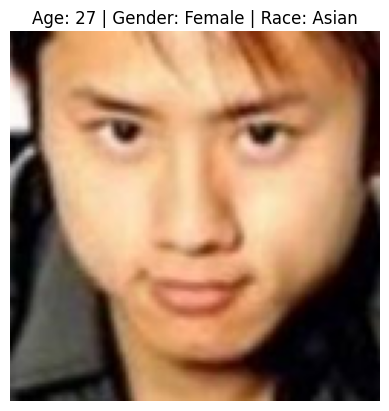

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Use one sample image path
test_img_path = "/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg"

# Load and preprocess image
img = cv2.imread(test_img_path)
img = cv2.resize(img, (128, 128))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_input = img_rgb / 255.0  # Normalize
img_input = np.expand_dims(img_input, axis=0)  # Add batch dimension

# Predict
age_pred, gender_pred, race_pred = model.predict(img_input)

# Process outputs
predicted_age = int(age_pred[0][0])
predicted_gender = "Male" if gender_pred[0][0] < 0.5 else "Female"
race_labels = ["White", "Black", "Asian", "Indian", "Others"]
predicted_race = race_labels[np.argmax(race_pred)]

# Show result
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"Age: {predicted_age} | Gender: {predicted_gender} | Race: {predicted_race}")
plt.show()

In [20]:
evaluation = model.evaluate(test_gen)

loss = evaluation[0]
age_mae = evaluation[4]
gender_accuracy = evaluation[5]
race_accuracy = evaluation[6]

print(f"Overall Loss: {loss}")
print(f"Age MAE: {age_mae}")
print(f"Gender Accuracy: {gender_accuracy}")
print(f"Race Accuracy: {race_accuracy}")

418/418 ━━━━━━━━━━━━━━━━━━━━ 100s 238ms/step - age_output_loss: 9.1875 - age_output_mae: 9.1875 - gender_output_accuracy: 0.8390 - gender_output_loss: 0.3639 - loss: 10.3579 - race_output_accuracy: 0.7028 - race_output_loss: 0.8064
Overall Loss: 10.430648803710938
Age MAE: 9.249955177307129
Gender Accuracy: 0.8362739086151123
Race Accuracy: 0.7024521827697754


### 📁 Upload Custom Image (Colab)
Use the file uploader to manually upload an image from your local system for prediction. This is helpful for testing the model on real-world images.


In [26]:
from google.colab import files  # Use this only if you're in Colab
uploaded = files.upload()


Saving IMG_20240227_221129.JPG to IMG_20240227_221129.JPG


### 🔍 Predict Age, Gender & Race from Uploaded Image
This cell loads the uploaded image, preprocesses it, feeds it into the trained model, and displays the predicted **age**, **gender**, and **race**.

- The image is resized and normalized.
- Model predicts:
  - 🧓 **Age**: Regression output
  - 🚻 **Gender**: Binary classification
  - 🌍 **Race**: Multi-class classification
- Output is shown with `matplotlib` including predicted labels.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step


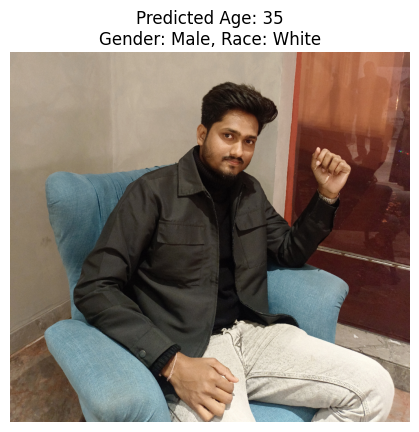

In [30]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Image path (your uploaded image)
img_path = "IMG_20240227_221129.JPG"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(1000, 1080))
img_array = image.img_to_array(img)
img_input = np.expand_dims(img_array, axis=0) / 255.0

# Predict
age_pred, gender_pred, race_pred = model.predict(img_input)

# Decode results
predicted_age = int(age_pred[0][0])
predicted_gender = 'Male' if np.argmax(gender_pred[0]) == 0 else 'Female'
race_labels = ['White', 'Black', 'Asian', 'Indian', 'Others']
predicted_race = race_labels[np.argmax(race_pred[0])]

# Show result
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted Age: {predicted_age}\nGender: {predicted_gender}, Race: {predicted_race}")
plt.show()


### 💾 Download Trained Model (`.keras`)
This cell allows you to download the trained model file (`age_gender_race_model.keras`) from the Colab environment to your local machine for deployment or further use.


In [32]:
from google.colab import files
files.download("age_gender_race_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>